<a href="https://colab.research.google.com/github/z018/CJL/blob/main/AIDL_20220311.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**series的運算**

---
建立series

*   使用pandas.Series()
*   使用字典資料型態傳入pandas.Series()



In [ ]:
import pandas as pd
from pandas import Series, DataFrame  
obj2 = pd.Series([4, 7, 5, 3], index=['d', 'b', 'a', 'c'])    #左邊為index，右邊為value的data
obj2



d    4
b    7
a    5
c    3
dtype: int64

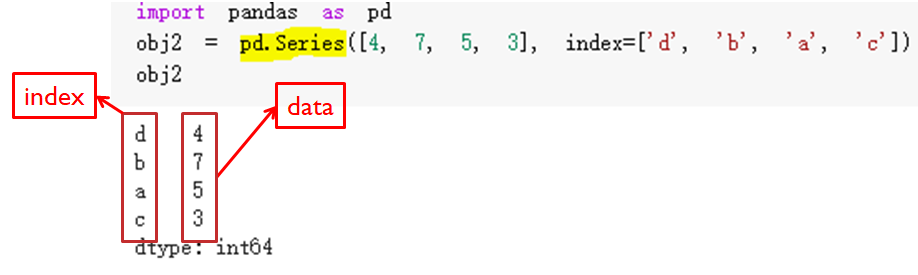

In [ ]:
obj2.index  #顯示index值

Index(['d', 'b', 'a', 'c'], dtype='object')

In [ ]:
obj2['a']  #也可單純叫出index內，對應的資料

5

In [ ]:
obj2[obj2 > 4] #判斷obj2大於4時，顯示出大於4的數值

d    6
b    7
a    5
dtype: int64

In [ ]:
b='b' in obj2 #判斷index 是否真實存在
print(b)
print('__________')
e='e' in obj2
print(e)

True
__________
False


In [ ]:
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon':16000, 'Utah': 5000}
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = pd.Series(sdata, index=states) #可指定index而顺序是按states
obj4

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

In [ ]:
obj4.isnull() #檢查檔案缺失 另外兩種寫法:pd.isnull(obj4)、pd.notnull(obj4)

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool

**DataFrame的運算**


---

建立DataFrame

*   使用pandas.Series()
*   使用字典資料型態傳入pandas.Series()



In [ ]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'], 
        'year': [2000, 2001, 2002, 2001, 2002, 2003], 
        'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}

frame = pd.DataFrame(data)

frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


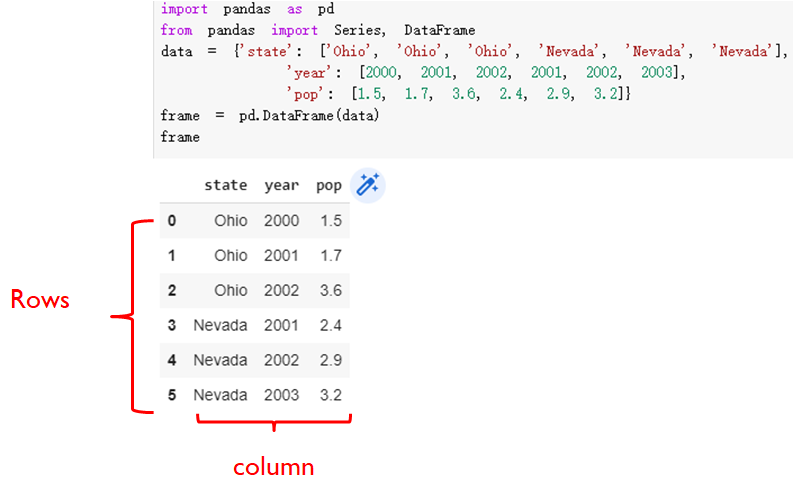

In [ ]:
pd.DataFrame(data, columns=['year', 'state', 'pop']) #指定index順序

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [ ]:
frame2 = pd.DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                index=['one', 'two', 'three', 'four', 'five', 'six'])
                #增加debt欄位，但沒相應的數值，所以顯示NaN
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [ ]:
co=frame2.columns   #跟series一樣可用這種形式來提取數值
print(co) 
print('_______')
st=frame2['state']
print(st)
print('_______')
ye=frame2.year
print(ye)

Index(['year', 'state', 'pop', 'debt'], dtype='object')
_______
one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object
_______
one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64


In [ ]:
frame2.loc['three'] #提取'there'列的數值

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [ ]:
frame2['debt'] = 16.5 #給於剛剛為空值的debt數值
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [ ]:
val = pd.Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val  #將數值跟相應的index，存取於debt欄位
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [ ]:
frame2['eastern'] = frame2.state == 'Ohio' #新增eastern欄位，判斷資料為Ohio的就給予true
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [ ]:
del frame2['eastern'] #刪除eastern欄位
frame2.columns

Index(['year', 'state', 'pop', 'debt'], dtype='object')

In [ ]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
       'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}

In [ ]:
frame3 = pd.DataFrame(pop) #把外層的index(key)當列,內層當索引
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
pd.DataFrame(pop, index=[2001, 2002, 2003]) #指定index

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [ ]:
pdata = {'Ohio': frame3['Ohio'][:-1],       #series组成的dict
         'Nevada': frame3['Nevada'][:2]}
         

In [ ]:
pd.DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [ ]:
frame3.index.name = 'year'; frame3.columns.name = 'state' #給index的name屬性命名，並顯示出來

In [ ]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [ ]:
frame3.values #回傳二維陣列值

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

In [ ]:
frame2.values 

array([[2000, 'Ohio', 1.5, nan],
       [2001, 'Ohio', 1.7, -1.2],
       [2002, 'Ohio', 3.6, nan],
       [2001, 'Nevada', 2.4, -1.5],
       [2002, 'Nevada', 2.9, -1.7],
       [2003, 'Nevada', 3.2, nan]], dtype=object)